In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import sys
if 'google.colab' in sys.modules:

    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/steps.txt'

import ast

sentences_dict = {}

with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            key, value = line.split(' = ', 1)
            try:
                sentences_dict[key] = ast.literal_eval(value)
            except Exception as e:
                print(f"Error parsing the list for {key}: {e}")
print("Contents of sentences1:")
print(sentences_dict['sentences1'])


Contents of sentences1:
['0.000   GOAL                   SET-BUFFER-CHUNK GOAL GOER NIL', '0.050   PROCEDURAL             PRODUCTION-FIRED CHOOSE-STRATEGY', '0.100   PROCEDURAL             PRODUCTION-FIRED DECIDE-BRUTE', '0.150   PROCEDURAL             PRODUCTION-FIRED BRUTE-DECISION', 'assembly is always a good place to reduce time!', '0.200   PROCEDURAL             PRODUCTION-FIRED REHEADCOUNT', '0.250   PROCEDURAL             PRODUCTION-FIRED STOP', 'this is the end of one decision making', 'Utility updates with Reward = -2.0   alpha = 0.2', 'Updating utility of production CHOOSE-STRATEGY', 'Updating utility of production DECIDE-BRUTE', 'Updating utility of production BRUTE-DECISION', 'Updating utility of production REHEADCOUNT', 'Updating utility of production STOP', '0.300   PROCEDURAL             PRODUCTION-FIRED CHOOSE-STRATEGY', '0.350   PROCEDURAL             PRODUCTION-FIRED DECIDE-BRUTE', '0.400   PROCEDURAL             PRODUCTION-FIRED BRUTE-DECISION', '0.450   PROCEDURAL  

In [ ]:
sentences1 = sentences_dict['sentences1']
embedding1 = model.encode(sentences1)
print(embedding1.shape)

(92, 384)


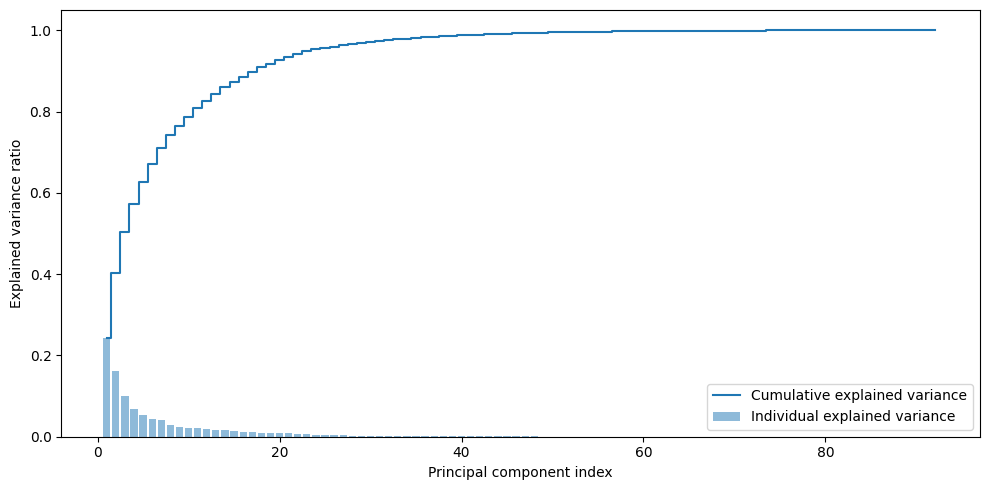

Variance explained by the first principal component: 24.22%


In [ ]:
pca_full = PCA()
pca_full.fit(embedding1)

explained_variance_ratio = pca_full.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Print the amount of variance explained by the first component
print(f"Variance explained by the first principal component: {explained_variance_ratio[0] * 100:.2f}%")

In [ ]:
# label all the subsymbolic ACT-R components for semantic analasis
labels1 = [
    'producedual' if 'PRODUCTION' in sentence
    else 'imaginal' if 'IMAGINAL' in sentence
    else 'goal' if 'GOAL' in sentence
    else 'utility' if 'UTILITY' in sentence or 'utility' in sentence
    else 'modify buffer' if 'MOD' in sentence
    else 'decisions'
    for sentence in sentences1
]


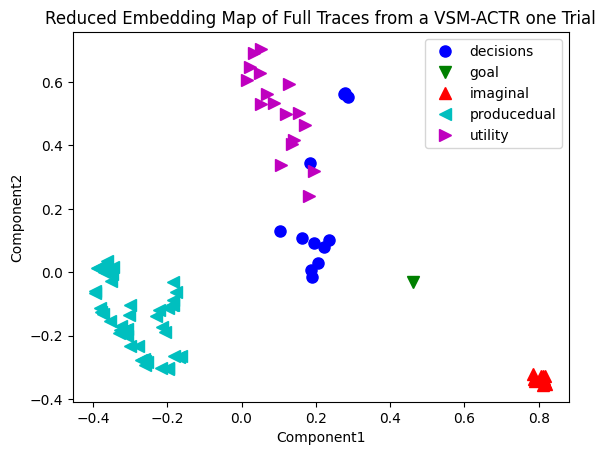

                    Multivariate linear model
                                                                 
------------------------------------------------------------------
        Intercept         Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.2054  5.0000  83.0000  64.2083  0.0000
          Pillai's trace  0.7946  5.0000  83.0000  64.2083  0.0000
  Hotelling-Lawley trace  3.8680  5.0000  83.0000  64.2083  0.0000
     Roy's greatest root  3.8680  5.0000  83.0000  64.2083  0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         label           Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0004 20.0000 276.2297  137.1660 0.0000
         Pillai's trace

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

pca = PCA(n_components=5)
reduced_embedding = pca.fit_transform(embedding1)

df = pd.DataFrame(reduced_embedding)
df.columns = [f'Dim{i+1}' for i in range(reduced_embedding.shape[1])]
df['label'] = labels1

groups = df.groupby('label')

fig, ax = plt.subplots()

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', 's', 'p']

for (name, group), color, marker in zip(groups, colors, markers):
    ax.plot(group.Dim1, group.Dim2, marker=marker, linestyle='', ms=8, label=name, color=color)

ax.legend()
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title('Reduced Embedding Map of Full Traces from a VSM-ACTR one Trial')
plt.show()

# MANOVA
formula = ' + '.join(df.columns[:-1]) + ' ~ label'
maov = MANOVA.from_formula(formula, data=df)
print(maov.mv_test())

In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
all_sets = [sentences_dict[f'sentences{i}'] for i in range(1, 241)]
all_embeddings = []
all_pca_embeddings = []
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

for i, sentences in enumerate(all_sets, 1):
    embeddings = model.encode(sentences)
    print(f"Original embeddings for set {i} have shape: {embeddings.shape}")

    # Apply PCA to reduce to 4 components
    pca = PCA(n_components= 4)
    pca_embeddings = pca.fit_transform(embeddings)
    all_pca_embeddings.append(pca_embeddings)

    print(f"Reduced PCA embeddings for set {i} have shape: {pca_embeddings.shape}")

print(all_pca_embeddings[0])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Original embeddings for set 1 have shape: (92, 384)
Reduced PCA embeddings for set 1 have shape: (92, 4)
Original embeddings for set 2 have shape: (97, 384)
Reduced PCA embeddings for set 2 have shape: (97, 4)
Original embeddings for set 3 have shape: (87, 384)
Reduced PCA embeddings for set 3 have shape: (87, 4)
Original embeddings for set 4 have shape: (89, 384)
Reduced PCA embeddings for set 4 have shape: (89, 4)
Original embeddings for set 5 have shape: (91, 384)
Reduced PCA embeddings for set 5 have shape: (91, 4)
Original embeddings for set 6 have shape: (97, 384)
Reduced PCA embeddings for set 6 have shape: (97, 4)
Original embeddings for set 7 have shape: (100, 384)
Reduced PCA embeddings for set 7 have shape: (100, 4)
Original embeddings for set 8 have shape: (87, 384)
Reduced PCA embeddings for set 8 have shape: (87, 4)
Original embeddings for set 9 have shape: (98, 384)
Reduced PCA embeddings for set 9 have shape: (98, 4)
Original embeddings for set 10 have shape: (97, 384)


In [ ]:
concatenated_sets = []
for set_embeddings in all_pca_embeddings:
    concatenated_sentence = np.concatenate([sentence.flatten() for sentence in set_embeddings])
    concatenated_sets.append(concatenated_sentence)
# Print the shapes of each concatenated set for verification
for index, emb in enumerate(concatenated_sets):
    print(f"Concatenated embeddings for set {index + 1} have shape: {emb.shape}")

Concatenated embeddings for set 1 have shape: (368,)
Concatenated embeddings for set 2 have shape: (388,)
Concatenated embeddings for set 3 have shape: (348,)
Concatenated embeddings for set 4 have shape: (356,)
Concatenated embeddings for set 5 have shape: (364,)
Concatenated embeddings for set 6 have shape: (388,)
Concatenated embeddings for set 7 have shape: (400,)
Concatenated embeddings for set 8 have shape: (348,)
Concatenated embeddings for set 9 have shape: (392,)
Concatenated embeddings for set 10 have shape: (388,)
Concatenated embeddings for set 11 have shape: (336,)
Concatenated embeddings for set 12 have shape: (388,)
Concatenated embeddings for set 13 have shape: (364,)
Concatenated embeddings for set 14 have shape: (356,)
Concatenated embeddings for set 15 have shape: (336,)
Concatenated embeddings for set 16 have shape: (356,)
Concatenated embeddings for set 17 have shape: (412,)
Concatenated embeddings for set 18 have shape: (388,)
Concatenated embeddings for set 19 ha

In [ ]:
reshaped_sets = [embedding.reshape(1, -1) for embedding in concatenated_sets]

for index, emb in enumerate(reshaped_sets):
    print(f"Reshaped embeddings for set {index + 1} have shape: {emb.shape}")

Reshaped embeddings for set 1 have shape: (1, 368)
Reshaped embeddings for set 2 have shape: (1, 388)
Reshaped embeddings for set 3 have shape: (1, 348)
Reshaped embeddings for set 4 have shape: (1, 356)
Reshaped embeddings for set 5 have shape: (1, 364)
Reshaped embeddings for set 6 have shape: (1, 388)
Reshaped embeddings for set 7 have shape: (1, 400)
Reshaped embeddings for set 8 have shape: (1, 348)
Reshaped embeddings for set 9 have shape: (1, 392)
Reshaped embeddings for set 10 have shape: (1, 388)
Reshaped embeddings for set 11 have shape: (1, 336)
Reshaped embeddings for set 12 have shape: (1, 388)
Reshaped embeddings for set 13 have shape: (1, 364)
Reshaped embeddings for set 14 have shape: (1, 356)
Reshaped embeddings for set 15 have shape: (1, 336)
Reshaped embeddings for set 16 have shape: (1, 356)
Reshaped embeddings for set 17 have shape: (1, 412)
Reshaped embeddings for set 18 have shape: (1, 388)
Reshaped embeddings for set 19 have shape: (1, 400)
Reshaped embeddings f

In [ ]:
#padding
import numpy as np
normalized_sets = []

for tensor in reshaped_sets:
    current_length = tensor.shape[1]
    if current_length > 5120:
        trimmed_tensor = tensor[:, :4096]
    elif current_length < 5120:
        padding = np.zeros((1, 5120 - current_length))
        trimmed_tensor = np.concatenate((tensor, padding), axis=1)
    else:
        trimmed_tensor = tensor
    normalized_sets.append(trimmed_tensor)

# Verify the new shapes
for index, emb in enumerate(normalized_sets):
    print(f"Normalized embeddings for set {index + 1} have shape: {emb.shape}")

Normalized embeddings for set 1 have shape: (1, 4096)
Normalized embeddings for set 2 have shape: (1, 4096)
Normalized embeddings for set 3 have shape: (1, 4096)
Normalized embeddings for set 4 have shape: (1, 4096)
Normalized embeddings for set 5 have shape: (1, 4096)
Normalized embeddings for set 6 have shape: (1, 4096)
Normalized embeddings for set 7 have shape: (1, 4096)
Normalized embeddings for set 8 have shape: (1, 4096)
Normalized embeddings for set 9 have shape: (1, 4096)
Normalized embeddings for set 10 have shape: (1, 4096)
Normalized embeddings for set 11 have shape: (1, 4096)
Normalized embeddings for set 12 have shape: (1, 4096)
Normalized embeddings for set 13 have shape: (1, 4096)
Normalized embeddings for set 14 have shape: (1, 4096)
Normalized embeddings for set 15 have shape: (1, 4096)
Normalized embeddings for set 16 have shape: (1, 4096)
Normalized embeddings for set 17 have shape: (1, 4096)
Normalized embeddings for set 18 have shape: (1, 4096)
Normalized embeddin

In [ ]:
import numpy as np

tensor_stack = np.array(normalized_sets).squeeze()

mean_tensor = np.mean(tensor_stack, axis=0)

In [ ]:
std_dev_tensor = np.std(tensor_stack, axis=0)

std_dev_tensor[std_dev_tensor == 0] = 1
# Standardize the mean tensor
standardized_mean_tensor = mean_tensor/ std_dev_tensor

In [ ]:
print("Standardized Mean Tensor:", standardized_mean_tensor)

Standardized Mean Tensor: [ 0.33658036 -0.821017   -0.43053366 ... -0.36542332  0.2037078
 -0.14681532]


In [ ]:
import pandas as pd

standardized_mean_df = pd.DataFrame(standardized_mean_tensor.reshape(1, -1))  # Reshape to ensure it's two-dimensional

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/My Drive/mean_output8.csv'
standardized_mean_df.to_csv(csv_file_path, index=False)
print(f"File saved as {csv_file_path}.")

File saved as /content/drive/My Drive/mean_output8.csv.
